In [8]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
# tf.__version__ : '1.14.0'

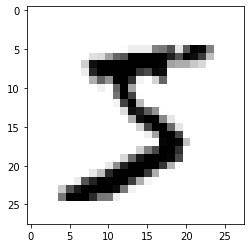

In [2]:
# Import MNIST data and preview 
mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits from 0-9a
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [3]:
# Normalising data set
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Creating the deep learning model
model = tf.keras.models.Sequential() # initialise by stating the model type to be a feedforward sequential model
model.add(tf.keras.layers.Flatten()) # add a flatten layer because the data input is a 2-D array that we want to flatten into a 1-D array
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.softmax)) # this is the last classification layer so softmax as the activation function is ideal for probabiity distribution

# Compiling the deep learning model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Training the deep learning model
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3190 - accuracy: 0.9104
Epoch 2/3
60000/60000 [==============================] - 3s 44us/sample - loss: 0.1211 - accuracy: 0.9630
Epoch 3/3
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0815 - accuracy: 0.9748


In [4]:
# Evaluating the performance of the model
val_loss, val_acc = model.evaluate(x_test, y_test)
print('val_loss: ', val_loss, 'val_acc: ', val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [5]:
# Saving the model
model.save('MNIST_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: MNIST_reader.model/assets


[[3.68013360e-07 1.78879489e-07 2.67862360e-05 ... 3.99066847e-13
  2.76211020e-13 5.63852892e-14]
 [2.41742583e-07 1.27155578e-03 9.98667836e-01 ... 1.11294327e-15
  1.33733416e-15 3.38602331e-15]
 [3.53803841e-07 9.99488473e-01 2.78480111e-05 ... 3.93203081e-10
  4.55147586e-10 3.03742542e-09]
 ...
 [1.92135499e-08 1.81765699e-07 5.11868024e-08 ... 2.08894513e-10
  5.21111709e-10 1.13592177e-10]
 [1.89883394e-06 3.16128848e-08 1.69703938e-07 ... 1.25274222e-10
  1.41245057e-10 9.52679255e-12]
 [2.79858832e-05 1.73439414e-08 3.89227154e-07 ... 1.41224645e-11
  6.21038919e-13 2.79203917e-12]]
7


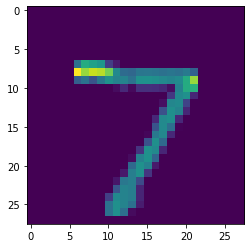

In [9]:
# Testing out the new saved model
new_model = tf.keras.models.load_model('MNIST_reader.model')
predictions = new_model.predict([x_test])
print(predictions)
print(np.argmax(predictions[0]))
plt.imshow(x_test[0])
plt.show()